# Retrieveing the timetrace and its statistics from tcspc data:

In [1]:
from nanooptics import cycorr, read_tcspc
import numpy as np
import matplotlib.pyplot as plt
import nanooptics.photophysics as pp

In [2]:
def timetrace(timestamp, integration_time=100e-3, counts_per_second=True):
    bins = int(timestamp[-1] / integration_time)
    counts, t = np.histogram(timestamp[timestamp < (integration_time * np.float(bins))], bins=bins)
    t = t[:-1]
    if counts_per_second:
        counts = counts / integration_time
    return t, counts

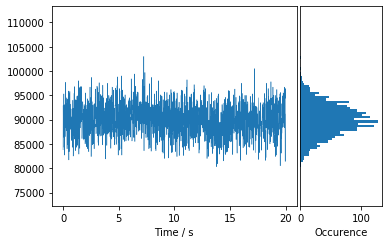

In [3]:
header, data = read_tcspc.read_picoquant('sample_data.pt2')
tmax=20
binsize=10e-3

# initialize figure
fig, ax = plt.subplots(1, 2,figsize=(5.5,3.5), gridspec_kw = {'width_ratios':[3, 1]})

# calculate timetrace
ts = data.timestamp
t_mask = ts < tmax
t, counts = timetrace(ts[t_mask], integration_time=binsize)

# plot timetrace and histogram
ax[0].plot(t, counts, linewidth=.5)
ax[1].hist(counts, bins=50, orientation='horizontal', histtype='stepfilled')     


# format plot
ax[0].set_xlabel('Time / s')
ax[1].set_xlabel('Occurence')
ax[1].set_yticks([])
fig.tight_layout(h_pad=0, w_pad=0)

# make sure all histograms have the same y scale
for a in ax[:]:
    a.set_ylim(np.min(counts)*0.9, np.max(counts)*1.1)